In [1]:
!pip install Augmentor
!pip install tensorflow_addons
import os
from os import path
import random
import numpy as np
import pandas as pd
import cv2
import Augmentor
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers ,Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,SeparableConv2D, MaxPooling2D,MaxPool2D, Dense,Add, Flatten,GlobalAvgPool2D
from tensorflow.keras.layers import Dropout,GlobalAveragePooling2D,BatchNormalization, Input 
from tensorflow.keras.layers import ReLU,DepthwiseConv2D ,AvgPool2D,concatenate ,ReLU
from keras.preprocessing import image
from tensorflow_addons.optimizers import CyclicalLearningRate

In [2]:
All_Data = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/Driver-Behaviour1/New_Driver_Behaviour/train",
    label_mode='categorical',
    color_mode='rgb',
    batch_size=16,
    image_size=(256, 256)
)

Found 26714 files belonging to 10 classes.


In [3]:
All_Data.class_names

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [4]:
print(len(All_Data))

1670


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


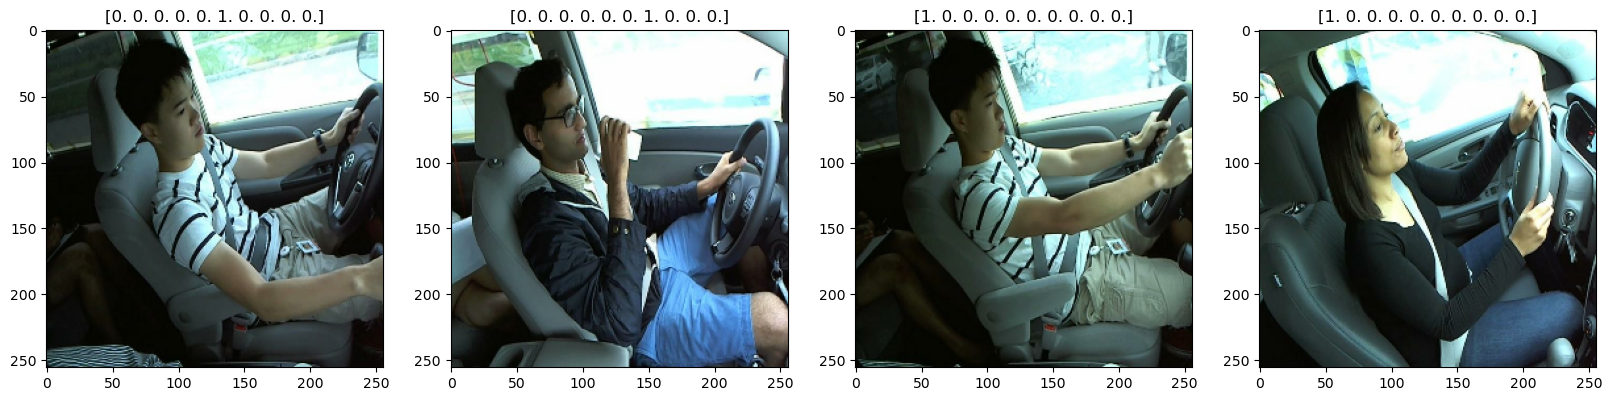

In [6]:
# visualize some images with labeles
data_iterator = All_Data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# scaling the images
All_Data = All_Data.map(lambda x,y: (x/255, y))

In [7]:
train_size = 1336
val_size =334

train = All_Data.take(train_size)
val = All_Data.skip(train_size).take(val_size)

In [8]:
print(len(train))
print(len(val))


1336
334


In [9]:
def drow_stats(hist):
    fig = plt.figure()
    plt.plot(hist.history['loss'], color='teal', label='loss')
    plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
    fig.suptitle('Loss', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()

    fig = plt.figure()
    plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
    plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
    fig.suptitle('Accuracy', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()

In [10]:
vgg16 = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(256,256,3))

model = keras.Sequential()
model.add(vgg16)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


58889256/58889256 [==============================] - 0s 0us/step


In [11]:
cyclical_learning_rate = CyclicalLearningRate(
 initial_learning_rate=3e-7,
 maximal_learning_rate=0.0001,
 step_size=len(train),
 scale_fn=lambda x: 1 / (2.0 ** (x - 1)),
 scale_mode='cycle')

optimizer = tf.keras.optimizers.Adam(learning_rate = cyclical_learning_rate, clipvalue=0.1)
                                 
model.compile(loss="categorical_crossentropy",
                  optimizer =optimizer, metrics=["accuracy"])

In [12]:
# tf.random.set_seed(7)
history = model.fit(x = train, validation_data = val,epochs = 2,batch_size=16)#,callbacks=model_checkpoint_callback)

Epoch 1/2
1336/1336 [==============================] - 453s 323ms/step - loss: 0.6321 - accuracy: 0.7995 - val_loss: 0.2951 - val_accuracy: 0.9181
Epoch 2/2
1336/1336 [==============================] - 436s 326ms/step - loss: 0.1357 - accuracy: 0.9661 - val_loss: 0.0901 - val_accuracy: 0.9753


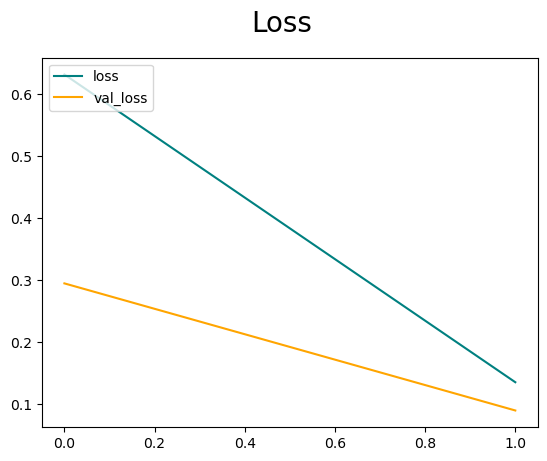

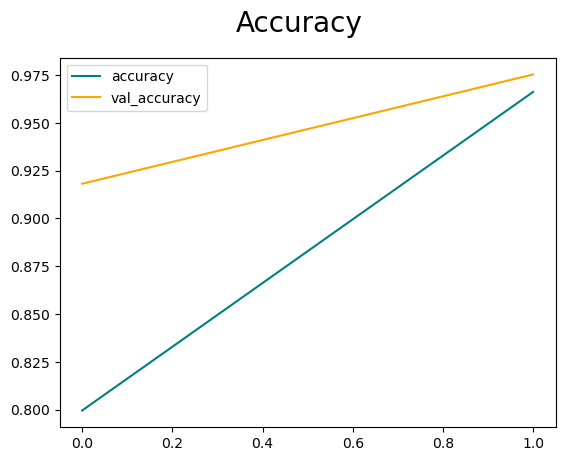

In [13]:
drow_stats(history)

In [14]:
Test_Data = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/Driver-Behaviour1/New_Driver_Behaviour/Test",
    label_mode='categorical',
    color_mode='rgb',
    batch_size=16,
    image_size=(256, 256)
)

Found 6897 files belonging to 10 classes.


In [15]:
print(len(Test_Data))

432


In [16]:
model.evaluate(Test_Data)

432/432 [==============================] - 36s 83ms/step - loss: 5.2989 - accuracy: 0.9793


[5.298928260803223, 0.979266345500946]

[3109, 2767, 2797, 2926, 2736, 2772, 2805, 2472, 2051, 2279]


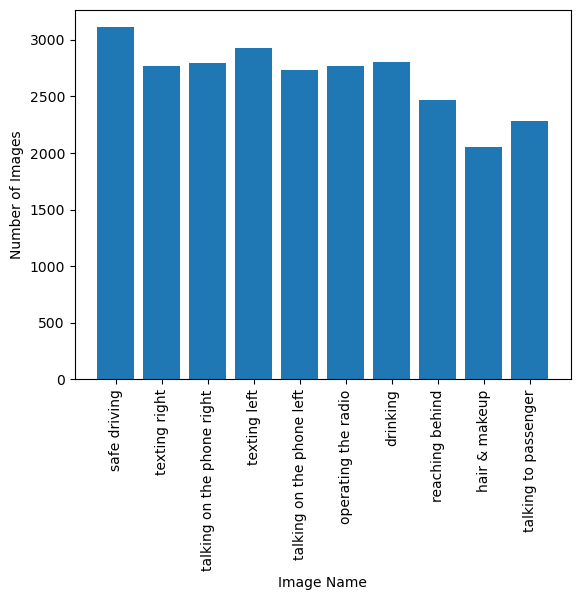

In [17]:
# Number of data per class Train
# image = "/kaggle/input/Driver-Behaviour1/New_Driver_Behaviour/train/c0"
# print(image)
# px.histogram(name_images,number_images)
# px.xlabel('name of images')
# px.ylabel('number_images')
# px.show()
import plotly.express as px
number_images = [3109, 2767, 2797, 2926, 2736, 2772, 2805, 2472, 2051, 2279]
name_images = ["safe driving", "texting right", "talking on the phone right", "texting left", 
               "talking on the phone left", "operating the radio", "drinking", "reaching behind",
               "hair & makeup", "talking to passenger"]
print(number_images)
plt.bar(name_images, number_images)
plt.xticks(rotation=90)
plt.xlabel('Image Name')
plt.ylabel('Number of Images')
plt.show()

[774, 776, 708, 736, 791, 730, 649, 622, 641, 570]


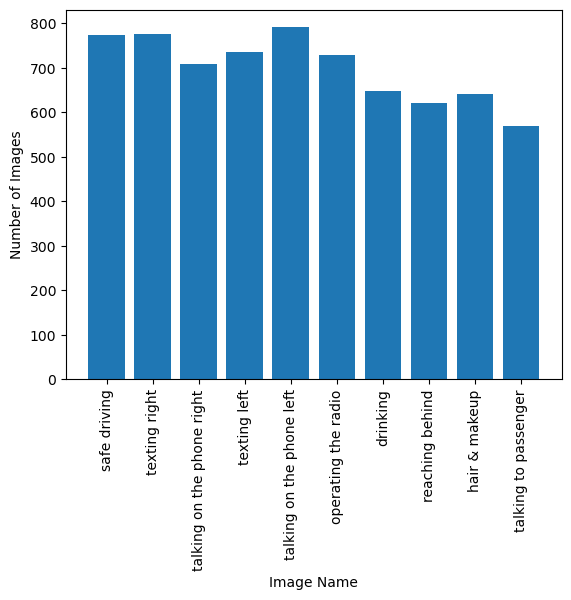

In [18]:
# Number of data per class Test
# image = "/kaggle/input/Driver-Behaviour1/New_Driver_Behaviour/train/c0"
# print(image)
# px.histogram(name_images,number_images)
# px.xlabel('name of images')
# px.ylabel('number_images')
# px.show()
import plotly.express as px
number_images = [774, 776, 708, 736, 791, 730, 649, 622, 641, 570,]
name_images = ["safe driving", "texting right", "talking on the phone right", "texting left", 
               "talking on the phone left", "operating the radio", "drinking", "reaching behind",
               "hair & makeup", "talking to passenger"]
print(number_images)
plt.bar(name_images, number_images)
plt.xticks(rotation=90)
plt.xlabel('Image Name')
plt.ylabel('Number of Images')
plt.show()

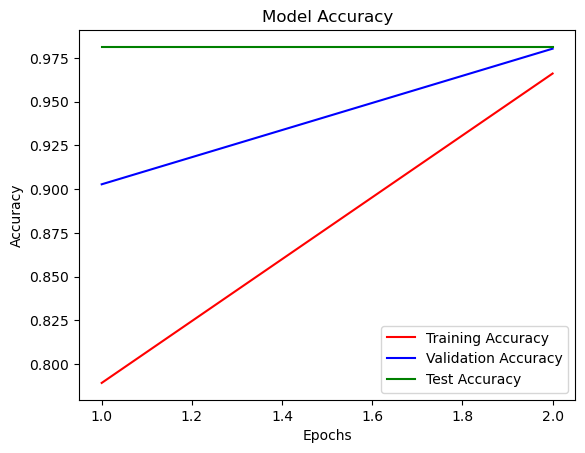

In [19]:
import matplotlib.pyplot as plt

# Generate data for the plot
train_accuracy = [0.7893, 0.9661]
validation_accuracy = [0.9028, 0.9803]
test_accuracy = [0.9813,0.9813]
epochs = [1, 2]

# Plot the data
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, test_accuracy, 'g', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[3109, 2767, 2797, 2926, 2736, 2772, 2805, 2472, 2051, 2279, 3700, 3318, 4503, 4503, 4503, 4503]


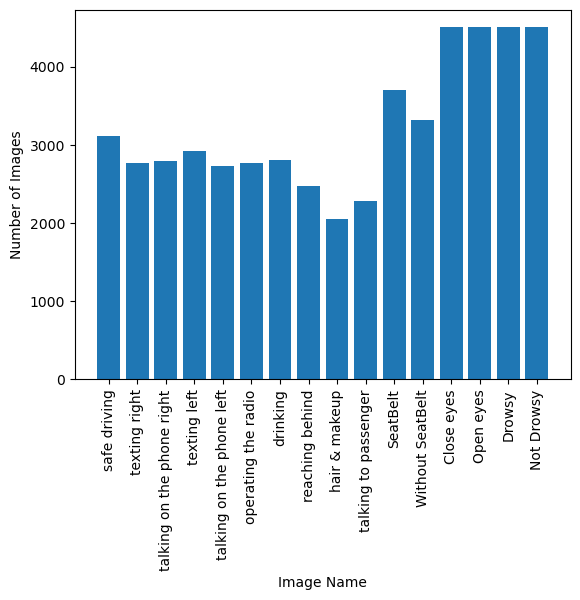

In [20]:
# Number of data per class Train
# image = "/kaggle/input/Driver-Behaviour1/New_Driver_Behaviour/train/c0"
# print(image)
# px.histogram(name_images,number_images)
# px.xlabel('name of images')
# px.ylabel('number_images')
# px.show()
import plotly.express as px
number_images = [3109, 2767, 2797, 2926, 2736, 2772, 2805, 2472, 2051, 2279,3700, 3318,
                4503, 4503, 4503, 4503]
name_images = ["safe driving", "texting right", "talking on the phone right", "texting left", 
               "talking on the phone left", "operating the radio", "drinking", "reaching behind",
               "hair & makeup", "talking to passenger","SeatBelt", "Without SeatBelt",
              "Close eyes", "Open eyes", "Drowsy", "Not Drowsy"]
print(number_images)
plt.bar(name_images, number_images)
plt.xticks(rotation=90)
plt.xlabel('Image Name')
plt.ylabel('Number of Images')
plt.show()

[774, 776, 708, 736, 791, 730, 649, 622, 641, 570, 800, 800, 1150, 1150, 1150, 1150]


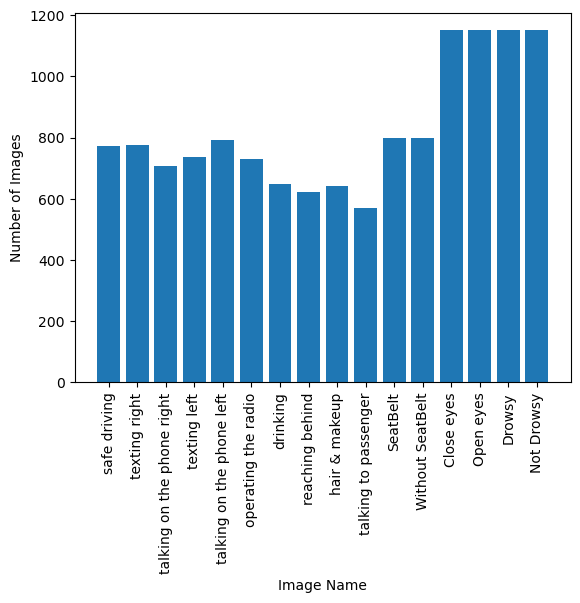

In [21]:
# Number of data per class Test
# image = "/kaggle/input/Driver-Behaviour1/New_Driver_Behaviour/train/c0"
# print(image)
# px.histogram(name_images,number_images)
# px.xlabel('name of images')
# px.ylabel('number_images')
# px.show()
import plotly.express as px
number_images = [774, 776, 708, 736, 791, 730, 649, 622, 641, 570,800,800,1150,1150,1150,1150]
name_images = ["safe driving", "texting right", "talking on the phone right", "texting left", 
               "talking on the phone left", "operating the radio", "drinking", "reaching behind",
               "hair & makeup", "talking to passenger","SeatBelt", "Without SeatBelt",
              "Close eyes", "Open eyes", "Drowsy", "Not Drowsy"]
print(number_images)
plt.bar(name_images, number_images)
plt.xticks(rotation=90)
plt.xlabel('Image Name')
plt.ylabel('Number of Images')
plt.show()

In [22]:
# model.save("Driver Behaviour_VGG16(97.5%).tfl")
# model.save("Driver Behaviour_VGG16(97.5%).h5")
# model.save("Driver Behaviour_VGG16(97.5%).pkl")